In [1]:
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

In [5]:
features = pd.read_csv('/content/features.csv')
train = pd.read_csv('/content/train(1).csv')
stores = pd.read_csv('/content/stores.csv')
test = pd.read_csv('/content/test(1).csv')

In [7]:
print(features.head())
print("------------------------------------------------------------\n")
print(stores.head())
print("------------------------------------------------------------\n")
print(train.head())
print("------------------------------------------------------------\n")
print(test.head())
print("------------------------------------------------------------\n")

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  
------------------------------------------------------------

   Store Type    Size
0      1    A  151315
1      2    A  202307
2

In [8]:
features.shape, train.shape, stores.shape, test.shape

((8190, 12), (421570, 5), (45, 3), (115064, 4))

In [9]:
print(features.dtypes)
print("------------------------------------------------------------\n")
print(train.dtypes)
print("------------------------------------------------------------\n")
print(stores.dtypes)
print("------------------------------------------------------------\n")
print(test.dtypes)

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object
------------------------------------------------------------

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object
------------------------------------------------------------

Store     int64
Type     object
Size      int64
dtype: object
------------------------------------------------------------

Store         int64
Dept          int64
Date         object
IsHoliday      bool
dtype: object


In [10]:
feature_store = features.merge(stores, how='inner', on = "Store")

In [11]:
train = train.merge(feature_store, how='inner', on=['Store','Date','IsHoliday'])

In [12]:
test = test.merge(feature_store, how='inner', on=['Store','Date','IsHoliday'])

In [13]:
train = train.copy()
test = test.copy()

train['Date'] = pd.to_datetime(train['Date'])
train['Year'] = pd.to_datetime(train['Date']).dt.year
train['Month'] = pd.to_datetime(train['Date']).dt.month
train['Week'] = pd.to_datetime(train['Date']).dt.week
train['Day'] = pd.to_datetime(train['Date']).dt.day
train.replace({'A': 1, 'B': 2,'C':3},inplace=True)

test['Date'] = pd.to_datetime(test['Date'])
test['Year'] = pd.to_datetime(test['Date']).dt.year
test['Month'] = pd.to_datetime(test['Date']).dt.month
test['Week'] = pd.to_datetime(test['Date']).dt.week
test['Day'] = pd.to_datetime(test['Date']).dt.day
test.replace({'A': 1, 'B': 2,'C':3},inplace=True)

In [14]:
print(train.head())
print("------------------------------------------------------------\n")
print(test.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     2 2010-02-05      50605.27      False        42.31       2.572   
2      1     3 2010-02-05      13740.12      False        42.31       2.572   
3      1     4 2010-02-05      39954.04      False        42.31       2.572   
4      1     5 2010-02-05      32229.38      False        42.31       2.572   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.096358   
2        NaN        NaN        NaN        NaN        NaN  211.096358   
3        NaN        NaN        NaN        NaN        NaN  211.096358   
4        NaN        NaN        NaN        NaN        NaN  211.096358   

   Unemployment  Type    Size  Year  Month  Week  Day  
0         8.106     1  151315  2010 

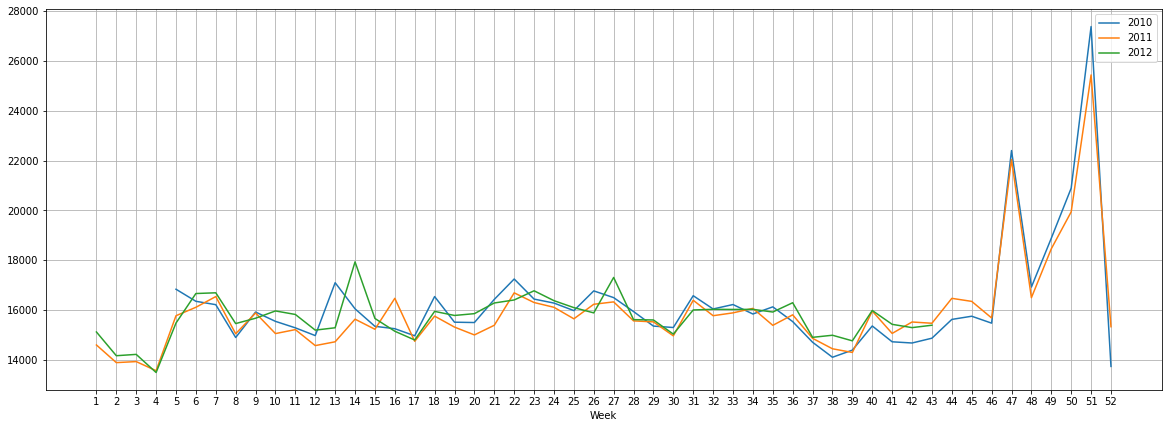

In [15]:
weekly_sales = train.groupby(['Year','Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2010 = train.loc[train['Year']==2010].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2011 = train.loc[train['Year']==2011].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2012 = train.loc[train['Year']==2012].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
plt.figure(figsize=(20, 7))
sns.lineplot(weekly_sales2010['Weekly_Sales']['mean'].index, weekly_sales2010['Weekly_Sales']['mean'].values)
sns.lineplot(weekly_sales2011['Weekly_Sales']['mean'].index, weekly_sales2011['Weekly_Sales']['mean'].values)
sns.lineplot(weekly_sales2012['Weekly_Sales']['mean'].index, weekly_sales2012['Weekly_Sales']['mean'].values)

plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'])
plt.show()

In [16]:
Y_train = train['Weekly_Sales']

In [17]:
targets = Y_train.copy()

In [18]:
train= train.drop(['Weekly_Sales'],axis=1)

In [20]:
numeric_cols = train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train.select_dtypes('object').columns.tolist()

In [21]:
print(numeric_cols)
print("------------------------------------------------------------\n")
print(categorical_cols)

['Store', 'Dept', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Year', 'Month', 'Week', 'Day']
------------------------------------------------------------

[]


In [22]:
train.isnull().sum()

Store                0
Dept                 0
Date                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
Year                 0
Month                0
Week                 0
Day                  0
dtype: int64

In [23]:
test.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Type                0
Size                0
Year                0
Month               0
Week                0
Day                 0
dtype: int64

In [24]:
imputer = SimpleImputer(missing_values= np.NaN, strategy='mean')

In [25]:
imputer.fit(train[numeric_cols])

SimpleImputer()

In [26]:
train[numeric_cols] =imputer.transform(train[numeric_cols])

In [27]:
train.isnull().sum()

Store           0
Dept            0
Date            0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Year            0
Month           0
Week            0
Day             0
dtype: int64

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
scaler.fit(train[numeric_cols])

MinMaxScaler()

In [32]:
train[numeric_cols] = scaler.transform(train[numeric_cols])

In [33]:
train[numeric_cols].describe().loc[['min', 'max']]

,Store,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,Day
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [34]:
train= train.drop(['Date'],axis=1)
test = test.drop(['Date'], axis=1)

In [35]:
X_train =train[['Store','Dept','IsHoliday','Size','Week','Type','Year']]
X_test = test[['Store', 'Dept','IsHoliday', 'Size', 'Week', 'Type', 'Year']]

In [36]:
print(X_train.columns)
print(X_test.columns)

Index(['Store', 'Dept', 'IsHoliday', 'Size', 'Week', 'Type', 'Year'], dtype='object')
Index(['Store', 'Dept', 'IsHoliday', 'Size', 'Week', 'Type', 'Year'], dtype='object')


In [37]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

In [38]:
from xgboost import XGBRegressor

In [39]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [40]:
model.fit(train_inputs,train_targets)

[12:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=4, n_estimators=20, n_jobs=-1, random_state=42)

In [42]:
#Let's turn this into a dataframe and visualize the most important features
importance_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance':model.feature_importances_
}).sort_values('importance', ascending=False)

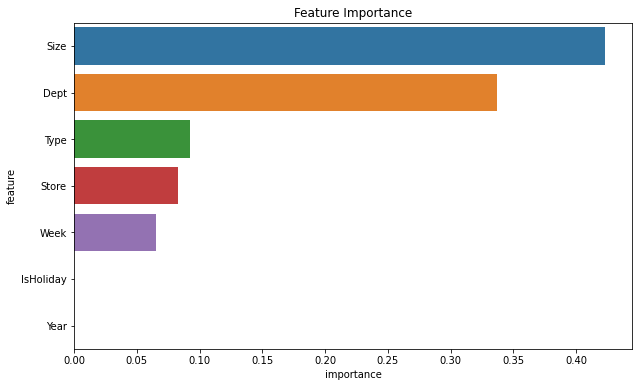

In [43]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [44]:
#Make and evaluate predictions
x_pred = model.predict(train_inputs)
x_pred

array([ 4421.1025,  6982.323 ,  7777.918 , ..., 59104.188 , 14766.857 ,
       18813.03  ], dtype=float32)

In [45]:
#Mean squared Error
def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [46]:
rmse(x_pred,train_targets)

14512.11770940201

In [47]:
x_preds=model.predict(X_test)
x_preds

array([10529.779, 10529.779, 10529.779, ..., 10529.779, 10529.779,
       10529.779], dtype=float32)

In [48]:
Final = X_test[['Store', 'Dept', 'Week']]
test['Weekly_Sales']= x_preds

In [51]:
#RandomForestRegressor
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

In [52]:
test_params(n_estimators=20, max_depth=20)

(1797.811385410645, 3434.4162052825995)

In [53]:
test_params(n_estimators=50, max_depth=10,min_samples_split=3, min_samples_leaf=4, max_features=0.4)

(13806.977338643439, 14212.377040662092)

In [54]:
#plot the graph between training error and validation error
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [57]:
#fitting the model with Hyperparameter Overfitting
RF = RandomForestRegressor(n_estimators=58, max_depth=27, max_features=6, min_samples_split=3, min_samples_leaf=1)
RF.fit(train_inputs,train_targets)

RandomForestRegressor(max_depth=27, max_features=6, min_samples_split=3,
                      n_estimators=58)

In [58]:
RF.score(train_inputs, train_targets)

0.9952395541868558

In [59]:
RF.score(val_inputs, val_targets)

0.9775479884584282

In [60]:
#Make and evaluate predictions
train_preds = RF.predict(train_inputs)
train_preds

array([7.26020115e+00, 1.75999633e+03, 4.95473106e+02, ...,
       6.01831420e+04, 3.58675880e+04, 1.50730247e+04])

In [61]:
#Evaluation
rmse(train_targets,train_preds)

1563.8232053559818

In [62]:
#Linear Regression
#importing the LinearRegression algorithm
from sklearn.linear_model import LinearRegression

In [63]:
#fitting the model
lr=LinearRegression()
lr.fit(train_inputs,train_targets)

LinearRegression()

In [64]:
Y_pred=lr.predict(train_inputs)
Y_pred

array([10511.43062391, 15878.69963478, 22838.38990493, ...,
       26901.83662411, 12732.32849333, 20548.72973757])

In [65]:
#Evaluation
rmse(train_targets,Y_pred)

21674.949850452453